https://github.com/hendrycks/anomaly-seg

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from huggingface_hub import login
from google.colab import userdata

login(token=userdata.get('HF_TOKEN'))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [6]:
!wget https://people.eecs.berkeley.edu/~hendrycks/streethazards_test.tar -O /content/streethazards_test.tar

--2024-07-08 20:29:28--  https://people.eecs.berkeley.edu/~hendrycks/streethazards_test.tar
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2150484992 (2.0G) [application/x-tar]
Saving to: ‘/content/streethazards_test.tar’

/content/streethaza 100%[===================>]   2.00G  86.3MB/s    in 27s     

2024-07-08 20:29:55 (75.8 MB/s) - ‘/content/streethazards_test.tar’ saved [2150484992/2150484992]



In [7]:
import tarfile

# Define the path to the tar file
tar_file_path = "/content/streethazards_test.tar"

# Open and extract the tar file
with tarfile.open(tar_file_path, "r") as tar:
    tar.extractall(path="/content/streethazards_test")

print("Extraction completed.")


Extraction completed.


In [ ]:
# !rm -rf streethazards_test.tar

In [12]:
from datasets import Dataset, DatasetDict, Image
from PIL import Image as PILImage
import os
import json
import numpy as np


def create_streethazards_dataset_dict(data_root):
    dataset_dict = {"image": [], "mask": [], "image_name": []}

    image_base_dir = os.path.join(data_root, "images", "test")
    annotation_base_dir = os.path.join(data_root, "annotations", "test")

    # Iterate over subdirectories
    for sub_dir in os.listdir(annotation_base_dir):
        annotation_dir = os.path.join(annotation_base_dir, sub_dir)
        image_dir = os.path.join(image_base_dir, sub_dir)

        if os.path.isdir(annotation_dir) and os.path.isdir(image_dir):
            for ann_file in os.listdir(annotation_dir):
                annotation_path = os.path.join(annotation_dir, ann_file)
                image_name = os.path.splitext(ann_file)[0]
                full_image_name = f"{sub_dir}_{image_name}"


                # images
                image_path = os.path.join(image_dir, ann_file)

                print(full_image_name)
                print(annotation_path, image_path)
                print(f"\n")

                # creating the dict
                dataset_dict["image"].append(image_path)
                dataset_dict["mask"].append(annotation_path)
                dataset_dict["image_name"].append(full_image_name)

    # Sorting based on image_name to ensure consistency
    sorted_indices = np.argsort(dataset_dict["image_name"])
    for key in dataset_dict.keys():
        dataset_dict[key] = [dataset_dict[key][i] for i in sorted_indices]

    return dataset_dict


# Create DatasetDict for lostandfound
data_root = "/content/streethazards_test/test"
streethazards_dataset_dict = create_streethazards_dataset_dict(data_root)

print(streethazards_dataset_dict.keys())

def create_dataset(image_paths, mask_paths, image_names):
    dataset = Dataset.from_dict({"image": image_paths,
                                 "mask": mask_paths,
                                 "image_name": image_names
                                })
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("mask", Image())
    return dataset


test_dict = {k: [x for i, x in enumerate(v)] for k, v in streethazards_dataset_dict.items()}
test_dataset = create_dataset(test_dict["image"], test_dict["mask"], test_dict["image_name"])

dataset = DatasetDict({"data": test_dataset})

Streaming output truncated to the last 5000 lines.
/content/streethazards_test/test/annotations/test/t5/119.png /content/streethazards_test/test/images/test/t5/119.png


t5_499
/content/streethazards_test/test/annotations/test/t5/499.png /content/streethazards_test/test/images/test/t5/499.png


t5_502
/content/streethazards_test/test/annotations/test/t5/502.png /content/streethazards_test/test/images/test/t5/502.png


t5_773
/content/streethazards_test/test/annotations/test/t5/773.png /content/streethazards_test/test/images/test/t5/773.png


t5_96
/content/streethazards_test/test/annotations/test/t5/96.png /content/streethazards_test/test/images/test/t5/96.png


t5_242
/content/streethazards_test/test/annotations/test/t5/242.png /content/streethazards_test/test/images/test/t5/242.png


t5_255
/content/streethazards_test/test/annotations/test/t5/255.png /content/streethazards_test/test/images/test/t5/255.png


t5_532
/content/streethazards_test/test/annotations/test/t5/532.png /content/

In [13]:
dataset

DatasetDict({
    data: Dataset({
        features: ['image', 'mask', 'image_name'],
        num_rows: 1500
    })
})

In [14]:
dataset["data"].features

{'image': Image(mode=None, decode=True, id=None),
 'mask': Image(mode=None, decode=True, id=None),
 'image_name': Value(dtype='string', id=None)}

In [16]:
test_dict['image']

['/content/streethazards_test/test/images/test/t5/1.png',
 '/content/streethazards_test/test/images/test/t5/10.png',
 '/content/streethazards_test/test/images/test/t5/100.png',
 '/content/streethazards_test/test/images/test/t5/1000.png',
 '/content/streethazards_test/test/images/test/t5/1001.png',
 '/content/streethazards_test/test/images/test/t5/1002.png',
 '/content/streethazards_test/test/images/test/t5/1003.png',
 '/content/streethazards_test/test/images/test/t5/1004.png',
 '/content/streethazards_test/test/images/test/t5/1005.png',
 '/content/streethazards_test/test/images/test/t5/1006.png',
 '/content/streethazards_test/test/images/test/t5/1007.png',
 '/content/streethazards_test/test/images/test/t5/1008.png',
 '/content/streethazards_test/test/images/test/t5/1009.png',
 '/content/streethazards_test/test/images/test/t5/101.png',
 '/content/streethazards_test/test/images/test/t5/1010.png',
 '/content/streethazards_test/test/images/test/t5/1011.png',
 '/content/streethazards_test/t

In [17]:
test_dict['mask']

['/content/streethazards_test/test/annotations/test/t5/1.png',
 '/content/streethazards_test/test/annotations/test/t5/10.png',
 '/content/streethazards_test/test/annotations/test/t5/100.png',
 '/content/streethazards_test/test/annotations/test/t5/1000.png',
 '/content/streethazards_test/test/annotations/test/t5/1001.png',
 '/content/streethazards_test/test/annotations/test/t5/1002.png',
 '/content/streethazards_test/test/annotations/test/t5/1003.png',
 '/content/streethazards_test/test/annotations/test/t5/1004.png',
 '/content/streethazards_test/test/annotations/test/t5/1005.png',
 '/content/streethazards_test/test/annotations/test/t5/1006.png',
 '/content/streethazards_test/test/annotations/test/t5/1007.png',
 '/content/streethazards_test/test/annotations/test/t5/1008.png',
 '/content/streethazards_test/test/annotations/test/t5/1009.png',
 '/content/streethazards_test/test/annotations/test/t5/101.png',
 '/content/streethazards_test/test/annotations/test/t5/1010.png',
 '/content/street

In [18]:
test_dict['image_name']

['t5_1',
 't5_10',
 't5_100',
 't5_1000',
 't5_1001',
 't5_1002',
 't5_1003',
 't5_1004',
 't5_1005',
 't5_1006',
 't5_1007',
 't5_1008',
 't5_1009',
 't5_101',
 't5_1010',
 't5_1011',
 't5_1012',
 't5_1013',
 't5_1014',
 't5_1015',
 't5_1016',
 't5_1017',
 't5_1018',
 't5_1019',
 't5_102',
 't5_1020',
 't5_1021',
 't5_1022',
 't5_1023',
 't5_1024',
 't5_103',
 't5_104',
 't5_105',
 't5_106',
 't5_107',
 't5_108',
 't5_109',
 't5_11',
 't5_110',
 't5_111',
 't5_112',
 't5_113',
 't5_114',
 't5_115',
 't5_116',
 't5_117',
 't5_118',
 't5_119',
 't5_12',
 't5_120',
 't5_121',
 't5_122',
 't5_123',
 't5_124',
 't5_125',
 't5_126',
 't5_127',
 't5_128',
 't5_129',
 't5_13',
 't5_130',
 't5_131',
 't5_132',
 't5_133',
 't5_134',
 't5_135',
 't5_136',
 't5_137',
 't5_138',
 't5_139',
 't5_14',
 't5_140',
 't5_141',
 't5_142',
 't5_143',
 't5_144',
 't5_145',
 't5_146',
 't5_147',
 't5_148',
 't5_149',
 't5_15',
 't5_150',
 't5_151',
 't5_152',
 't5_153',
 't5_154',
 't5_155',
 't5_156',
 't5

In [19]:
# Push to the Hugging Face Model Hub
dataset.push_to_hub("BhavanaMalla/streethazards", private=True)

Uploading the dataset shards:   0%|          | 0/5 [00:00<?, ?it/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/BhavanaMalla/streethazards/commit/7f5a8734b9b40a93243c35a257cd2dad68b432b6', commit_message='Upload dataset', commit_description='', oid='7f5a8734b9b40a93243c35a257cd2dad68b432b6', pr_url=None, pr_revision=None, pr_num=None)

In [22]:
import datasets, transformers
from datasets import load_dataset

streethazards = load_dataset("BhavanaMalla/streethazards", split="data")

In [23]:
streethazards

Dataset({
    features: ['image', 'mask', 'image_name'],
    num_rows: 1500
})

In [24]:
import numpy as np
unique_list = []
for i in range(1500):
    unique_list.extend(np.unique(np.array(streethazards[i]["mask"])).tolist())

set(unique_list)

{1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [25]:
import numpy as np
unique_list = []
for i in range(1500):
    unique_list.append(np.array(streethazards[i]["mask"]).shape)

unique_list

[(720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720, 1280),
 (720,

In [26]:
import numpy as np
unique_list = []

for i in range(1500):
    unique_list.append(np.array(streethazards[i]["image"]).shape)

unique_list

[(720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4),
 (720, 1280, 4

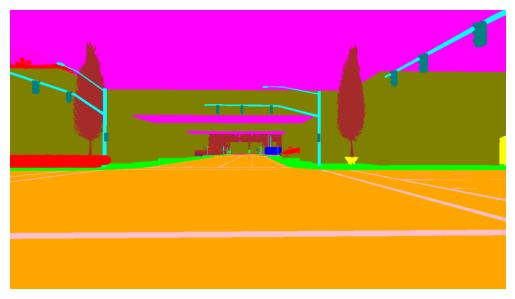

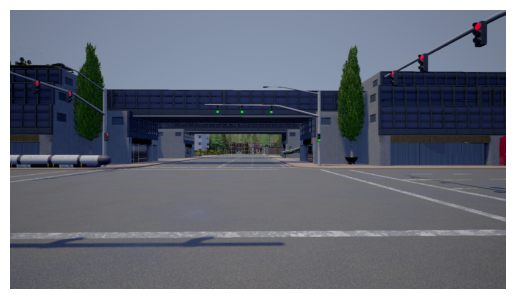

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap for visualization (you can customize as needed)
label_colors = {
    1: [255, 0, 255],    # Magenta
    2: [128, 128, 0],    # Olive
    3: [0, 0, 255],      # Blue
    4: [255, 255, 0],    # Yellow
    6: [0, 255, 255],    # Cyan
    7: [255, 192, 203],  # Pink
    8: [255, 165, 0],    # Orange
    9: [0, 255, 0],     # Green
    10: [165, 42, 42],   # Brown
    11: [128, 0, 128],    # Purple
    12: [0, 255, 0],     # Lime
    13: [0, 128, 128],   # Teal
    14: [255, 0, 0]      # Red
}


# Convert integer labels to RGB colors
mask = np.array(streethazards["mask"][0])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(streethazards["image"][0])
plt.imshow(image)
plt.axis('off')
plt.show()

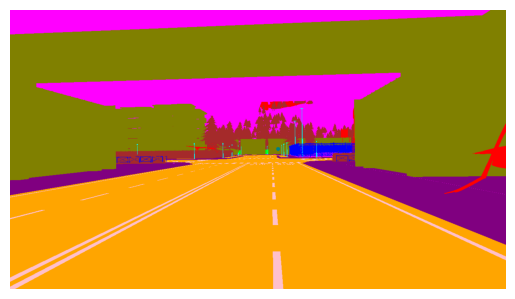

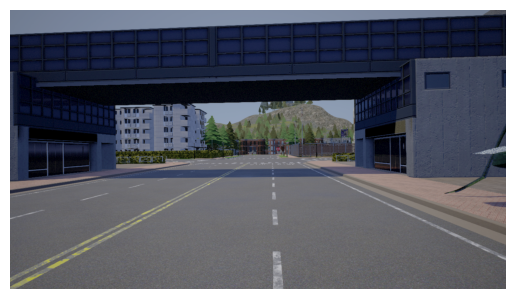

In [38]:
# Convert integer labels to RGB colors
mask = np.array(streethazards["mask"][1])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(streethazards["image"][1])
plt.imshow(image)
plt.axis('off')
plt.show()

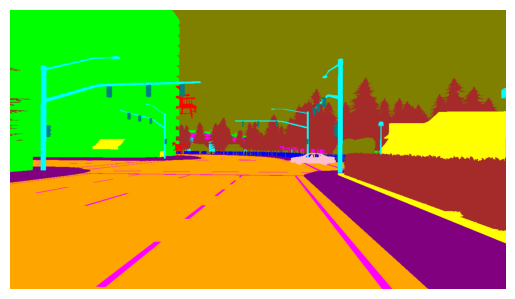

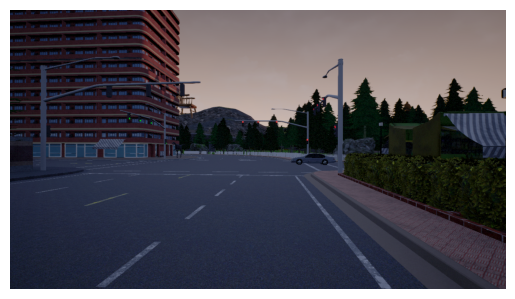

In [35]:
# Convert integer labels to RGB colors
mask = np.array(streethazards["mask"][20])
h, w = mask.shape
mask_rgb = np.zeros((h, w, 3), dtype=np.uint8)
for label, color in label_colors.items():
    mask_rgb[mask == label] = color

# Display the mask as an image using matplotlib
plt.imshow(mask_rgb)
plt.axis('off')
plt.show()


image = np.array(streethazards["image"][20])
plt.imshow(image)
plt.axis('off')
plt.show()